![](https://seeklogo.com/images/A/ATP-logo-BB517B1AC0-seeklogo.com.png)

### <span style="color:darkgreen">For this work, I used my [WTA notebook](https://www.kaggle.com/code/ilya2raev/wta-tennis) as a basis. This time it was much more entertaining, because we have less missing values and better formatted data.</span>

### <span style="color:darkgreen">Make an upvote if you like it!</span>

In [1]:
%%time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, Style
import warnings

warnings.filterwarnings('ignore')
def colorize(text:str, color=Fore.GREEN, style=Style.BRIGHT):
    print(style + color + text + Style.RESET_ALL)

CPU times: user 911 ms, sys: 372 ms, total: 1.28 s
Wall time: 1.67 s


In [2]:
%%time
df = pd.read_csv('/kaggle/input/atp-tennis-2000-2023daily-pull/atp_tennis.csv')

CPU times: user 162 ms, sys: 48.4 ms, total: 211 ms
Wall time: 280 ms


In [3]:
colorize(f'{df.Score.value_counts(normalize=True).head(20)}')

6-3 6-4        0.018301
3-6 4-6        0.017853
4-6 4-6        0.017671
6-4 6-4        0.017140
3-6 2-6        0.012018
6-3 6-2        0.011952
6-7 4-6        0.011538
4-6 3-6        0.011322
6-4 6-2        0.011140
4-6 2-6        0.011057
6-4 6-3        0.010775
3-6 3-6        0.010626
6-3 6-3        0.010543
7-6 6-4        0.010477
7-6 6-3        0.010344
6-7 3-6        0.009979
6-2 6-4        0.009416
4-6 6-7        0.009349
6-4 7-6        0.009217
6-3 7-6        0.008918
Name: Score, dtype: float64


In [4]:
%%time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60325 entries, 0 to 60324
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  60325 non-null  object 
 1   Date        60325 non-null  object 
 2   Series      60325 non-null  object 
 3   Court       60325 non-null  object 
 4   Surface     60325 non-null  object 
 5   Round       60325 non-null  object 
 6   Best of     60325 non-null  int64  
 7   Player_1    60325 non-null  object 
 8   Player_2    60325 non-null  object 
 9   Winner      60325 non-null  object 
 10  Rank_1      60325 non-null  int64  
 11  Rank_2      60325 non-null  int64  
 12  Pts_1       60325 non-null  int64  
 13  Pts_2       60325 non-null  int64  
 14  Odd_1       60325 non-null  float64
 15  Odd_2       60325 non-null  float64
 16  Score       60325 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 7.8+ MB
CPU times: user 102 ms, sys: 0 ns, total: 102 ms


### <span style="color:darkgreen">At first glance, it looks like data doesn't have any missing values. Dtypes also look well formatted (unlike [here](https://www.kaggle.com/code/ilya2raev/wta-tennis))</span>.

In [5]:
%%time
df.describe()

CPU times: user 31.1 ms, sys: 2.02 ms, total: 33.1 ms
Wall time: 37.8 ms


,Best of,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2
count,60325.000000,60325.000000,60325.000000,60325.000000,60325.000000,60325.000000,60325.000000
mean,3.377257,75.919121,75.652864,1083.273651,1090.667584,2.397549,2.388558
std,0.782433,100.767449,101.725824,1704.843703,1730.695859,2.680449,2.629334
min,3.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.000000,25.000000,24.000000,-1.000000,-1.000000,1.330000,1.330000
50%,3.000000,54.000000,54.000000,664.000000,665.000000,1.726750,1.730000
75%,3.000000,92.000000,92.000000,1195.000000,1205.000000,2.750000,2.750000
max,5.000000,3390.000000,4915.000000,16950.000000,16950.000000,67.000000,51.000000


Odds higher than 2.0 win percentage: 24.93 %
Odds higher than 3.0 win percentage: 7.28 %
Odds higher than 4.0 win percentage: 2.93 %
Odds higher than 5.0 win percentage: 1.36 %
Odds higher than 6.0 win percentage: 0.76 %
Odds higher than 7.0 win percentage: 0.43 %
Odds higher than 8.0 win percentage: 0.25 %
Odds higher than 9.0 win percentage: 0.19 %
Odds higher than 10.0 win percentage: 0.15 %


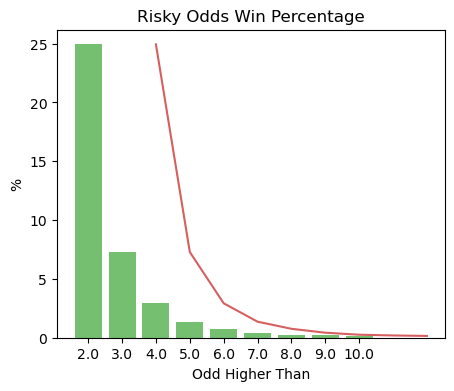

CPU times: user 605 ms, sys: 133 ms, total: 739 ms
Wall time: 508 ms


In [6]:
%%time
# Let's find out how many risky odds actually win
df_odds = df.query('Odd_1 != -1.0 and Odd_2 != -1.0')
coefs = np.arange(2.0, 11.0)
odds = []
for coef in coefs:
    value = (len(df_odds.query(f'Player_2 == Winner and Odd_2 > {coef}')) + len(df_odds.query(f'Player_1 == Winner and Odd_1 > {coef}'))) / len(df_odds) * 100
    colorize(f"Odds higher than {coef} win percentage: {'%.2f' % (value)} %")
    odds.append(value)
    
plt.subplots(figsize=(5,4))
sns.set_color_codes("muted")
sns.barplot(y=odds, x=coefs, color='g')
sns.lineplot(y=odds, x=coefs, color='r')
plt.title('Risky Odds Win Percentage')
plt.ylabel('%')
plt.xlabel('Odd Higher Than')
plt.show()  

### <span style="color:darkgreen">Inference: don't bet on risky odds in tennis unless you are 100% confident</span>.

### <span style="color:darkgreen">But what about total number of sets?</span>

In [7]:
%%time
df_bo3 = df.loc[df["Best of"] == 3]
df_bo3_2set = df_bo3.loc[df_bo3.Score.str.len() == 11]
df_bo3_3set = df_bo3.loc[df_bo3.Score.str.len() == 14]
df_bo3 = pd.concat([df_bo3_2set, df_bo3_3set], axis=0)

CPU times: user 58 ms, sys: 11.9 ms, total: 69.9 ms
Wall time: 69.5 ms


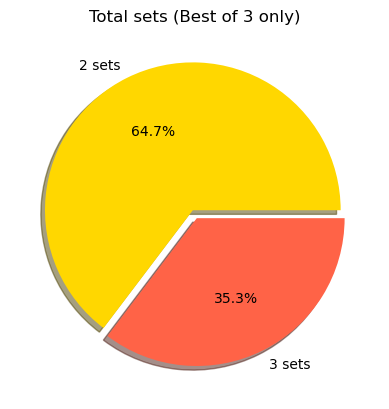

CPU times: user 203 ms, sys: 59.6 ms, total: 263 ms
Wall time: 167 ms


In [8]:
%%time
fig, ax = plt.subplots()
ax.pie(df_bo3.Score.str.len().value_counts(normalize=True),
       explode=(0.03, 0.03),
       labels=['2 sets', '3 sets'],
       autopct='%1.1f%%',
       colors=['gold', 'tomato'],
       shadow=True)
plt.title('Total sets (Best of 3 only)')
plt.show()

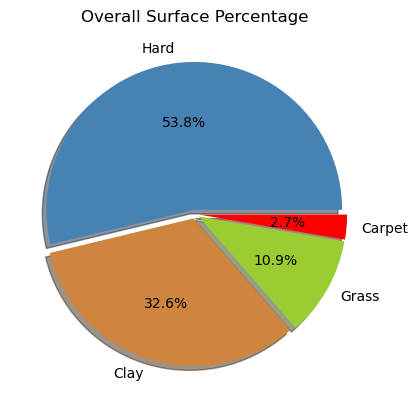

CPU times: user 269 ms, sys: 93.5 ms, total: 362 ms
Wall time: 195 ms


In [9]:
%%time
fix, ax = plt.subplots()
ax.pie(df.Surface.value_counts(normalize=True),
       explode=(0.03, 0.03, 0.03, 0.03),
       labels=df.Surface.unique(), 
       autopct='%1.1f%%',
       colors=['steelblue', 'peru', 'yellowgreen', 'red'],
       shadow=True
      )
plt.title('Overall Surface Percentage')
plt.show()

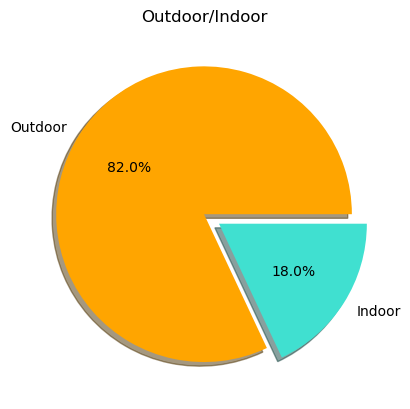

CPU times: user 220 ms, sys: 57.6 ms, total: 278 ms
Wall time: 165 ms


In [10]:
%%time
fix, ax = plt.subplots()
ax.pie(df.Court.value_counts(normalize=True),
       explode=(0, 0.12),
       labels=df.Court.unique(), 
       autopct='%1.1f%%',
       colors=['orange', 'turquoise'],
       shadow=True
      )
plt.title('Outdoor/Indoor')
plt.show()

In [11]:
colorize(f"{df['Best of'].value_counts()}")

3    48946
5    11379
Name: Best of, dtype: int64


### <span style="color:darkgreen">Technically, it should be best of 2 and best of 3 for Grand Slams</span>.


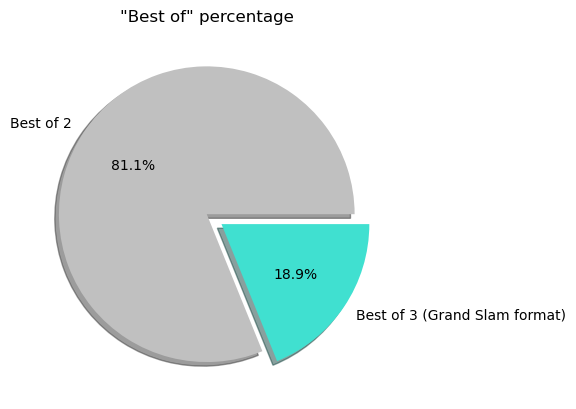

CPU times: user 224 ms, sys: 75.7 ms, total: 300 ms
Wall time: 175 ms


In [12]:
%%time
fix, ax = plt.subplots()
ax.pie(df['Best of'].value_counts(normalize=True),
       explode=(0, 0.12),
       labels=['Best of 2', 'Best of 3 (Grand Slam format)'], 
       autopct='%1.1f%%',
       colors=['silver', 'turquoise'],
       shadow=True)
plt.title('"Best of" percentage')
plt.show()

In [13]:
df.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


### <span style="color:darkgreen">Creating a dataframe which is going to contain all Grand Slam winners</span>

In [14]:
%%time
df.loc[df.Tournament == 'Australian Open'].loc[df.Round == 'The Final'][['Date', 'Winner']]

CPU times: user 14 ms, sys: 169 µs, total: 14.2 ms
Wall time: 13.8 ms


,Date,Winner
274,2000-01-17,Agassi A.
3150,2001-01-15,Agassi A.
6034,2002-01-14,Johansson T.
8777,2003-01-26,Agassi A.
11514,2004-01-31,Federer R.
14298,2005-01-30,Safin M.
17119,2006-01-29,Federer R.
19908,2007-01-28,Federer R.
22609,2008-01-27,Djokovic N.
25180,2009-02-01,Nadal R.


In [15]:
%%time
ao_winners = pd.DataFrame(df.loc[df.Tournament == 'Australian Open']
                            .loc[df.Round == 'The Final']['Winner'])
ao_winners['Year'] = range(2000, 2024)
ao_winners['Tournament'] = 'Australian Open'

CPU times: user 12.5 ms, sys: 1.09 ms, total: 13.6 ms
Wall time: 13.1 ms


In [16]:
%%time
df.loc[df.Tournament == 'French Open'].loc[df.Round == 'The Final'][['Date', 'Winner']]

CPU times: user 14 ms, sys: 0 ns, total: 14 ms
Wall time: 13.7 ms


,Date,Winner
1382,2000-05-29,Kuerten G.
4283,2001-05-28,Kuerten G.
7077,2002-05-27,Costa A.
9821,2003-06-08,Ferrero J.C.
12567,2004-06-06,Gaudio G.
15383,2005-06-05,Nadal R.
18194,2006-06-11,Nadal R.
20959,2007-06-10,Nadal R.
23655,2008-06-08,Nadal R.
26227,2009-06-07,Federer R.


In [17]:
%%time
rg_winners = pd.DataFrame(df.loc[df.Tournament == 'French Open']
                            .loc[df.Round == 'The Final']['Winner'])
rg_winners['Year'] = range(2000, 2024)
rg_winners['Tournament'] = 'Roland Garros'

CPU times: user 14.5 ms, sys: 58 µs, total: 14.6 ms
Wall time: 14 ms


In [18]:
%%time
df.loc[df.Tournament == 'Wimbledon'].loc[df.Round == 'The Final'][['Date', 'Winner']]

CPU times: user 11.8 ms, sys: 0 ns, total: 11.8 ms
Wall time: 11.8 ms


,Date,Winner
1649,2000-06-26,Sampras P.
4550,2001-06-25,Ivanisevic G.
7338,2002-06-24,Hewitt L.
10087,2003-07-06,Federer R.
12838,2004-07-04,Federer R.
15651,2005-07-03,Federer R.
18461,2006-07-09,Federer R.
21222,2007-07-08,Federer R.
23936,2008-07-06,Nadal R.
26486,2009-07-05,Federer R.


In [19]:
%%time
wim_winners = pd.DataFrame(df.loc[df.Tournament == 'Wimbledon']
                             .loc[df.Round == 'The Final']['Winner'])
wim_winners['Year'] = range(2000, 2022)
wim_winners_2021_to_2022 = wim_winners[wim_winners.Year >= 2020]
wim_winners_2021_to_2022.Year += 1
wim_winners = wim_winners.loc[wim_winners.Year < 2020]
wim_winners = pd.concat([wim_winners, wim_winners_2021_to_2022], axis=0)
wim_winners['Tournament'] = 'Wimbledon'

CPU times: user 13.6 ms, sys: 0 ns, total: 13.6 ms
Wall time: 13.6 ms


In [20]:
%%time
df.loc[df.Tournament == 'US Open'].loc[df.Round == 'The Final'][['Date', 'Winner']]  # 2019 Nadal (W) - Medvedev is missing

CPU times: user 13.3 ms, sys: 0 ns, total: 13.3 ms
Wall time: 13 ms


,Date,Winner
2330,2000-08-28,Safin M.
5237,2001-08-27,Hewitt L.
8022,2002-08-26,Sampras P.
10744,2003-09-07,Roddick A.
13490,2004-09-12,Federer R.
16329,2005-09-11,Federer R.
19135,2006-09-10,Federer R.
21856,2007-09-09,Federer R.
24477,2008-09-08,Federer R.
27046,2009-09-14,Del Potro J.M.


In [21]:
%%time
uso_winners = pd.DataFrame(df.loc[df.Tournament == 'US Open']
                             .loc[df.Round == 'The Final']['Winner'])
uso_winners['Year'] = range(2000, 2022)
uso_winners_2020_to_2022 = uso_winners[uso_winners.Year >= 2019]
uso_winners_2020_to_2022.Year += 1
uso_winners = uso_winners.loc[uso_winners.Year < 2019]
uso_winners = pd.concat([uso_winners, 
                         uso_winners_2020_to_2022], axis=0)
uso_winners['Tournament'] = 'US Open'
uso_winners = uso_winners.append(pd.DataFrame({'Winner': ['Nadal R.'],
                                               'Year': [2019],
                                               'Tournament': ['US Open']}),
                                 ignore_index=True)

CPU times: user 15.4 ms, sys: 0 ns, total: 15.4 ms
Wall time: 15.4 ms


In [22]:
%%time
gs_winners = pd.concat([ao_winners, rg_winners, 
                        wim_winners, uso_winners], axis=0) \
               .sort_values(by='Year') \
               .reset_index(drop=True)
gs_winners_pvt = gs_winners.pivot(index='Year', columns='Tournament', values='Winner')

CPU times: user 11.9 ms, sys: 0 ns, total: 11.9 ms
Wall time: 13.8 ms


In [23]:
%%time
gs_winners_pvt[['Australian Open', 'Roland Garros',
                'Wimbledon', 'US Open']].style.highlight_null(color='lightgreen')

CPU times: user 68.8 ms, sys: 2.37 ms, total: 71.1 ms
Wall time: 78.4 ms


Tournament,Australian Open,Roland Garros,Wimbledon,US Open
Year,,,,
2000,Agassi A.,Kuerten G.,Sampras P.,Safin M.
2001,Agassi A.,Kuerten G.,Ivanisevic G.,Hewitt L.
2002,Johansson T.,Costa A.,Hewitt L.,Sampras P.
2003,Agassi A.,Ferrero J.C.,Federer R.,Roddick A.
2004,Federer R.,Gaudio G.,Federer R.,Federer R.
2005,Safin M.,Nadal R.,Federer R.,Federer R.
2006,Federer R.,Nadal R.,Federer R.,Federer R.
2007,Federer R.,Nadal R.,Federer R.,Federer R.
2008,Djokovic N.,Nadal R.,Nadal R.,Federer R.


### <span style="color:darkgreen">Wimbledon 2020 was never played due to COVID-19</span>.

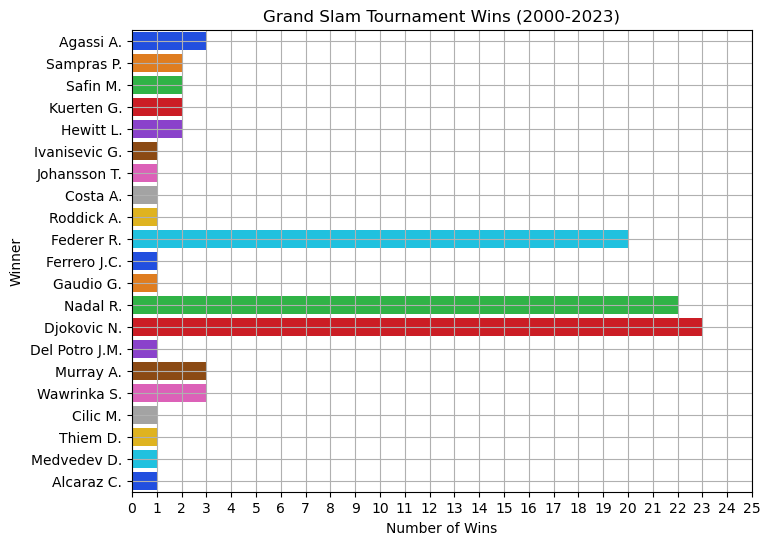

CPU times: user 605 ms, sys: 131 ms, total: 737 ms
Wall time: 493 ms


In [24]:
%%time
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(gs_winners, y='Winner', orient='v', palette='bright')
ax.set_xticks(range(26))
plt.title('Grand Slam Tournament Wins (2000-2023)')
plt.xlabel('Number of Wins')
plt.grid(True)
plt.show()

### <span style="color:darkgreen">Thanks for your time! Hope you enjoyed it</span>